Chris published another [post](https://x.com/ChrisMartzWX/status/1843633816809710041) based on the faulty `Big 6` data (he jacked up his `South Indian` scrape):

![](pix/cm-hurricane-ace.jpeg)

Interesting that the url in the chart is clickable (when viewed via Quick Look).

It takes you to the `global` basin data page which displayed a line chart for a user-chosen metric.

Choose `Accumulated Cyclone Energy` from the drop down.

Note the two first data points differ.  Not conclusion-changing by any means but sloppy nonetheless.

I think the problem is on the data's end.  Both Chris and I show ~700 for `1980` `ACE Index`.  Both of us summed the `Big 6`'s individual basin data together to get 697.8.  Well, I know I did; I assume Chris did.  

CSU also has a separate `global` basin.  Its `1980` `ACE Index` value was 638...which matches the value plotted from CSU's web site chart.  

The sum of the `Big 6` is 59.8 more than `global`.  Yet there is no individual basin value is close that.  Nor could any combination of values get close.  Thus, omitted basins in the `global`'s sum can be exonerated.

My bet is there's something wonky with the overlapping season year ends.  But then why not see this in every year?  All but a few other years (3 of the last 5 years) are spot on.

In [1]:
import polars as pl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import helper

### STEP 1 - Get the master data

In [2]:
master_df = helper.combine_input_sources()

### STEP 2 - Package the chart data

In [3]:
metrics = ['hurricanes', 'major_hurricanes', 'ace']

chart_df = (
    master_df
    .filter(
        pl.col('basin').is_in(helper.ALLOWABLE_BASINS),
        pl.col('season').is_between(1980, 2023)
    )
    .select(['basin', 'season'] + metrics)
    .group_by(['season']).sum()
    .drop('basin')
    .sort(by='season')
)

### STEP 3 - Mimic the chart format

In [4]:
seasons = chart_df['season'].to_list()
hurricanes = chart_df['hurricanes'].to_list()
major_hurricanes = chart_df['major_hurricanes'].to_list()
ace = chart_df['ace'].to_list()


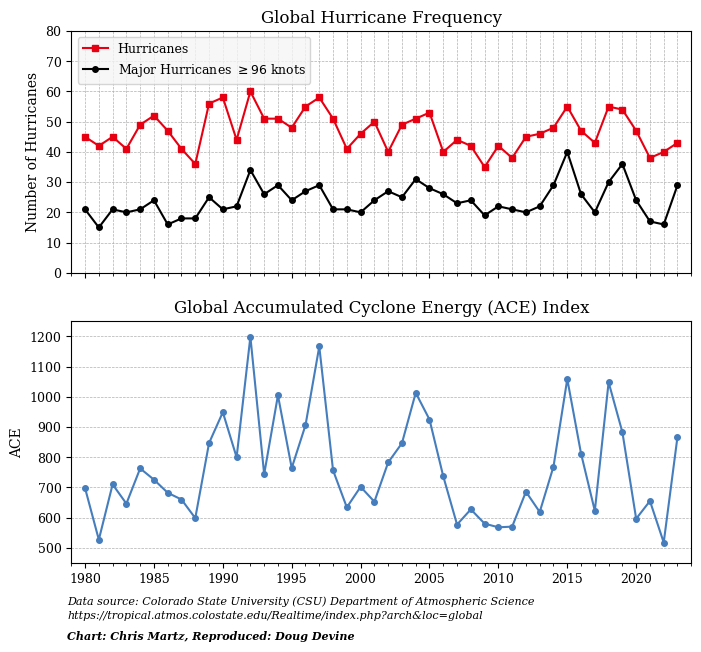

In [5]:
# Global settings for all text in the figure
plt.style.use('default')  # does this really do anything?
plt.rcParams['font.family'] = 'serif'
    
fig, axs = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

metric_params = {
    'hurricanes': {'label': 'Hurricanes', 'color': '#E70012'},
    'major_hurricanes': {'label': r'Major Hurricanes $\geq96$ knots', 'color': '#000000'},
    'ace': {'label': 'ACE', 'color': '#457DBD'},
}

# TOP HALF
axs[0].set_title('Global Hurricane Frequency')
axs[0].plot(seasons, hurricanes, marker='s', markersize=4, **metric_params['hurricanes'])
axs[0].plot(seasons, major_hurricanes, marker='o', markersize=4, **metric_params['major_hurricanes'])
axs[0].legend(loc='upper left', prop={'size': 9}, facecolor=(0.96, 0.96, 0.96))

# Set common x-axis
for ax in axs:
    ax.set_xlim(1979, 2024)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.tick_params(axis='both', which='major', labelsize=9)
    
# Set top half-specific x-axis
axs[0].grid(True, which='both', ls='--', lw=0.5)

# Set y-axis
axs[0].set_ylim(0, 80)
axs[0].set_ylabel('Number of Hurricanes')

# BOTTOM HALF
axs[1].set_title('Global Accumulated Cyclone Energy (ACE) Index')
axs[1].plot(seasons, ace, marker='o', markersize=4, **metric_params['ace'])

# Set x-axis
axs[1].grid(True, axis='y', ls='--', lw=0.5)

# Set y-axis
axs[1].set_ylim(450, 1250)
axs[1].set_ylabel('ACE')

# Add source attribution
attribution_1 = 'Data source: Colorado State University (CSU) Department of Atmospheric Science' 
attribution_2 = 'https://tropical.atmos.colostate.edu/Realtime/index.php?arch&loc=global'
attribution_3 = 'Chart: Chris Martz' 
attribution_4 = 'Reproduced: Doug Devine' 

plt.subplots_adjust(bottom=0.12)  # Adjust the bottom margin to make room for text
source_text = "Source: NOAA Hurricane Database\nData processed by [Your Name or Organization]"
# plt.figtext(0.5, 0.01, source_text, ha="center", va="center", fontsize=8, bbox=dict(boxstyle="round", ec="none", fc="yellow", alpha=0.8))
plt.figtext(0.12, 0.06, attribution_1, fontsize=8, style='italic') 
plt.figtext(0.12, 0.04, attribution_2, fontsize=8, style='italic') 
plt.figtext(0.12, 0.01, f'{attribution_3}, {attribution_4}', fontsize=8, style='italic', weight='bold') 

# Reveal the plot to the world
# plt.tight_layout()  # don't use with subplots_adjust()
plt.show()

### TODO

* gotta figure out that font:
  * check out the 'g' in 'Energy' in the bottom title...it's not the same
  * check out the attribution text...it's too short